# Heart disease 

IMPORTING THE LIBRARIES

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

LOAD THE DATASET

In [ ]:
heart = pd.read_csv('heart_disease.csv')

UNDERSTAND EACH COLUMN

In [4]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


 sex (1= male; 0=female)

 chest pain type (4 values) 

 serum cholestoral in mg/dl 

 fasting blood sugar > 120 mg/dl

 resting electrocardiographic results (values 0,1,2) 

 oldpeak = ST depression induced by exercise relative to rest 

 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (thallium heart scan or stress test)

 target (0 = no heart disease; 1 = heart disease)

GET THE INFORMATION OF COLUMNS AND NOTE THE OBSERVATION

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Obsrvations:

Null values are not present, datatypes are appropriate

Understand the data inside the dataframe using head()

In [6]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Display Bottom 10 Rows of The Dataset

In [7]:
heart.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# DATA CLEANING

1. Check Null Values In The Dataset

In [8]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

2. Check For Duplicate Data

In [9]:
heart.duplicated().any()

np.True_

3. Drop the duplicate values

In [10]:
heart = heart.drop_duplicates(keep='first')

# DATA TRANSFORMATION

1. Rename the column names

In [11]:
heart = heart.rename(columns={
    "cp": "chest_pain",
     "trestbps": "blood_pressure", 
     "fbs": "blood_sugar", 
     "ca": "vessels", 
     "chol": "cholesterol",
     'sex':'gender'
     })

2. Create health_status column to check to condition of the patients

In [12]:
heart['health_status'] = heart['target']
heart['health_status'] = ["healthy" if x == 0 else "sick" for x in heart['health_status']]

3. Drop coulmns that are not required

In [13]:
heart = heart.drop(columns=['exang', 'slope','restecg'])

# ANALYSIS

1. Find out how many people do and don't exhibit heart disease

In [14]:
heart['health_status'].value_counts()

health_status
sick       164
healthy    138
Name: count, dtype: int64

2. Gender-wise Count

In [15]:
heart['gender'].value_counts()

gender
1    206
0     96
Name: count, dtype: int64

3. Average Cholesterol

In [16]:
heart['cholesterol'].mean()

np.float64(246.5)

4. Maximum Heart Rate (thalach)

In [17]:
heart['thalach'].max()

np.int64(202)

5. Blood Pressure Stats by Health Status

In [18]:
heart.groupby('health_status')['blood_pressure'].mean()

health_status
healthy    134.398551
sick       129.250000
Name: blood_pressure, dtype: float64

6. People with cholesterol over 250

In [19]:
heart.query("cholesterol > 250")

,age,gender,chest_pain,blood_pressure,cholesterol,blood_sugar,thalach,oldpeak,vessels,thal,target,health_status
4,62,0,0,138,294,1,106,1.9,3,2,0,healthy
6,58,1,0,114,318,0,140,4.4,3,1,0,healthy
7,55,1,0,160,289,0,145,0.8,1,3,0,healthy
9,54,1,0,122,286,0,116,3.2,2,2,0,healthy
11,43,0,0,132,341,1,136,3.0,0,3,0,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...
616,43,1,0,115,303,0,181,1.2,0,2,1,sick
629,65,1,3,138,282,1,174,1.4,1,2,0,healthy
720,64,1,2,140,335,0,158,0.0,0,2,0,healthy
739,52,1,0,128,255,0,161,0.0,1,3,0,healthy


7. Healthy females only

In [20]:
heart.query("health_status == 'healthy' and gender == 0")

,age,gender,chest_pain,blood_pressure,cholesterol,blood_sugar,thalach,oldpeak,vessels,thal,target,health_status
4,62,0,0,138,294,1,106,1.9,3,2,0,healthy
11,43,0,0,132,341,1,136,3.0,0,3,0,healthy
25,61,0,0,145,307,0,146,1.0,0,3,0,healthy
27,58,0,1,136,319,1,152,0.0,2,2,0,healthy
29,55,0,0,180,327,0,117,3.4,0,2,0,healthy
42,61,0,0,130,330,0,169,0.0,0,2,0,healthy
47,66,0,0,178,228,1,165,1.0,2,3,0,healthy
51,57,0,0,140,241,0,123,0.2,0,3,0,healthy
69,62,0,0,160,164,0,145,6.2,3,3,0,healthy
87,59,0,0,174,249,0,143,0.0,0,2,0,healthy


8. Average cholesterol by health status and gender

In [21]:
heart.pivot_table(values='cholesterol', index='health_status', columns='gender', aggfunc='mean')

gender,0,1
health_status,,
healthy,274.958333,246.061404
sick,256.750000,231.597826


9. Average age and blood_pressure by health_status

In [22]:
heart.pivot_table(values=['age', 'blood_pressure'], index='health_status', aggfunc='mean')

,age,blood_pressure
health_status,,
healthy,56.601449,134.398551
sick,52.585366,129.250000


10. Get rows where 'thalach' > 150 and show only 'age' and 'thalach'

In [23]:
heart.loc[heart['thalach'] > 150, ['age', 'thalach']]

,age,thalach
0,52,168
1,53,155
3,61,161
12,34,192
14,52,156
...,...,...
629,65,174
691,55,161
720,64,158
733,44,175


11. Distribution of heart disease between men and women

In [24]:
heart.groupby(['gender', 'health_status'])['gender'].count()

gender  health_status
0       healthy           24
        sick              72
1       healthy          114
        sick              92
Name: gender, dtype: int64

In [25]:
heart.head()

,age,gender,chest_pain,blood_pressure,cholesterol,blood_sugar,thalach,oldpeak,vessels,thal,target,health_status
0,52,1,0,125,212,0,168,1.0,2,3,0,healthy
1,53,1,0,140,203,1,155,3.1,0,3,0,healthy
2,70,1,0,145,174,0,125,2.6,0,3,0,healthy
3,61,1,0,148,203,0,161,0.0,1,3,0,healthy
4,62,0,0,138,294,1,106,1.9,3,2,0,healthy


# ANALYSIS USING PLOTS

1. Get an overview distribution of each column

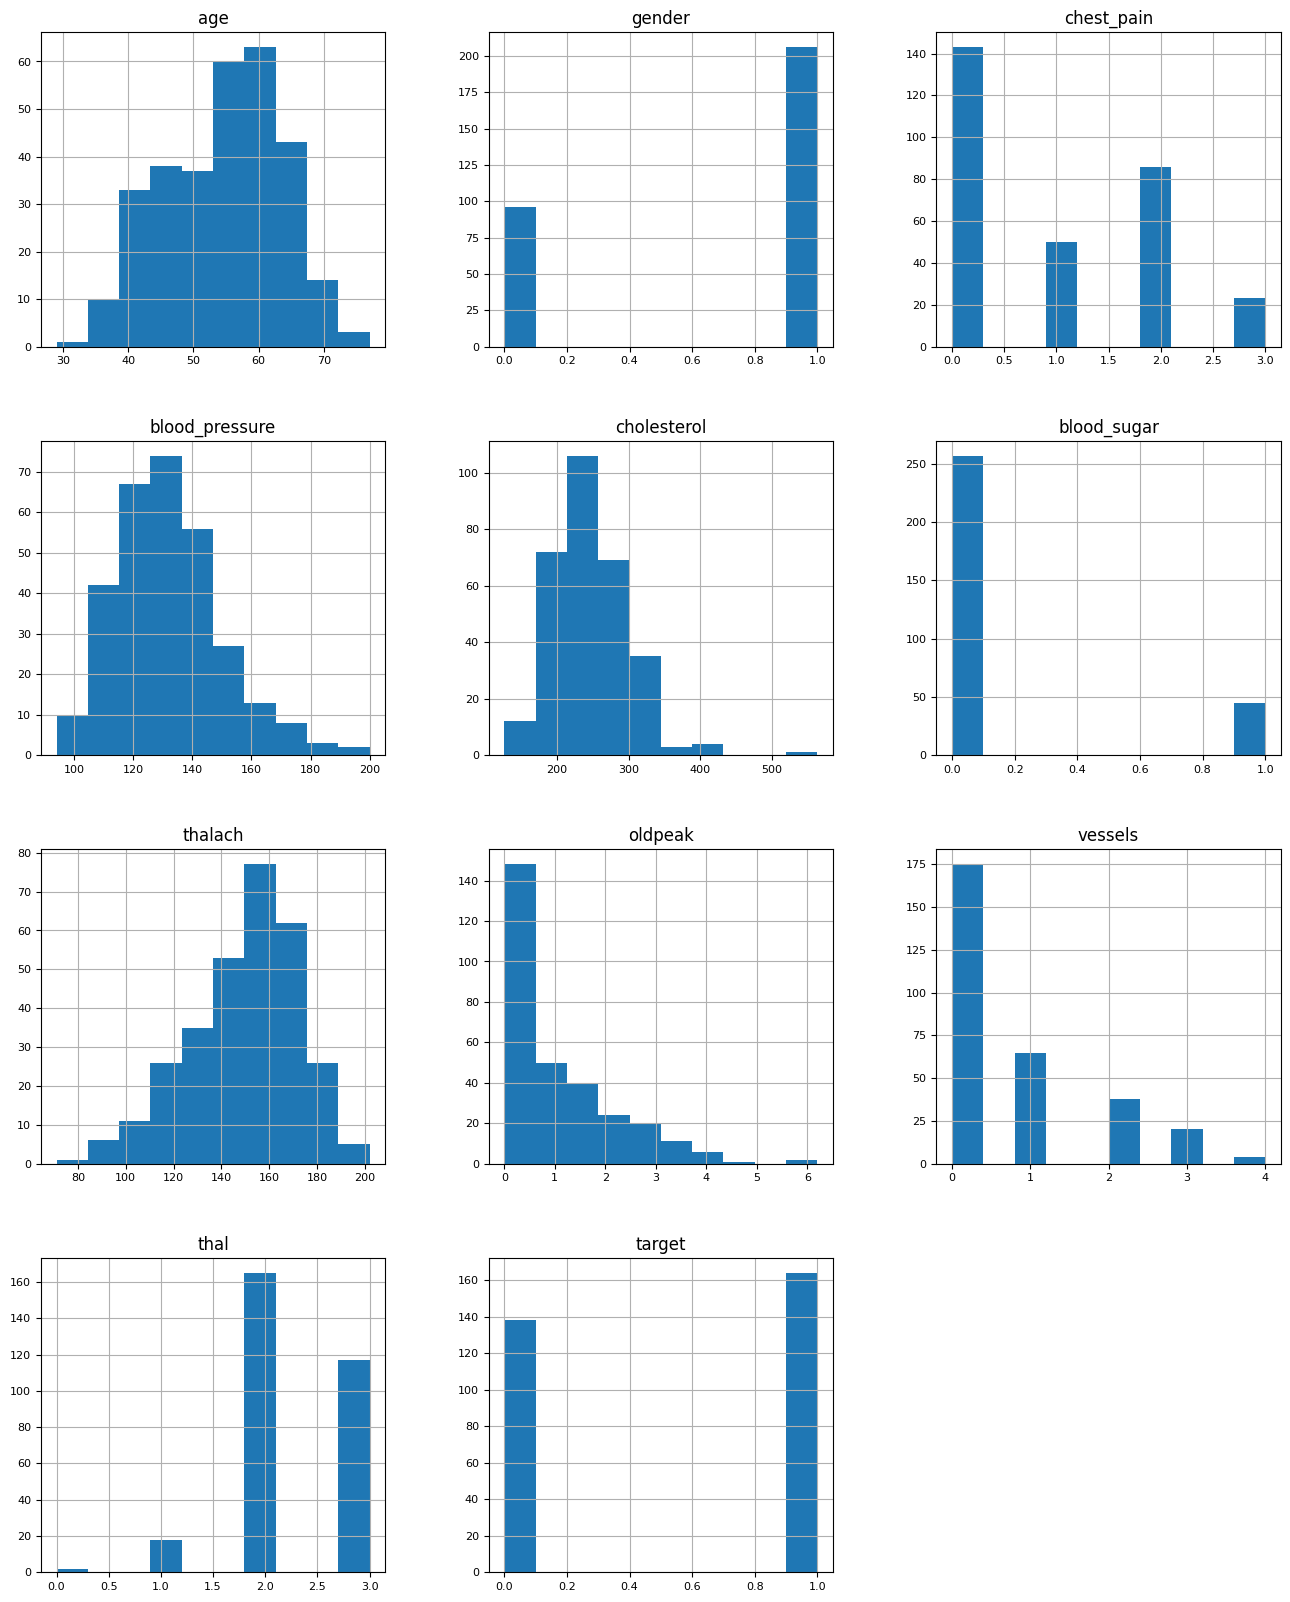

In [26]:
heart.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)
plt.show()

Observations:
- Age Distribution - Age is centrally distributed around 50-60, with fewer extremes.
- Gender Distribution - 'One' gender category is significantly more common.
- Chest Pain Distribution - Chest pain type 0 is most frequent; type 1 is rare.
- Blood Pressure Distribution - Blood pressure is mostly concentrated between 120-140 mmHg.
- Cholesterol Distribution - Cholesterol is right-skewed, peaking around 200-250 mg/dL.
- Blood Sugar Distribution - Most individuals have normal blood sugar levels.
- Thalach (Max Heart Rate) Distribution - Maximum heart rate is typically between 150-160 bpm.
- Oldpeak Distribution - oldpeak values are heavily concentrated near zero.
- Vessels Distribution - Most individuals have zero colored major vessels.
- T hal Distribution - thal category 2 is most common; category 1 is rare.
- Target Distribution - The target classes are relatively balanced.
- Gender Distribution - One gender category is significantly more prevalent.

2. Distribution of heart disease between men and women

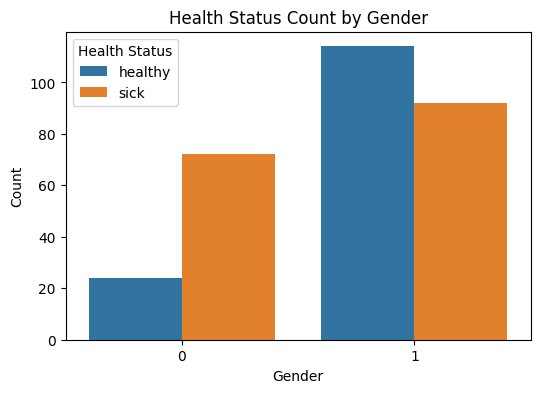

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=heart, x='gender', hue='health_status')
plt.title('Health Status Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Health Status')
plt.show()

Observations:

Gender 1 (male) has a higher count of "healthy" individuals than "sick" individuals. 

3. Distribution of heart disease between categories of chest pain3. 

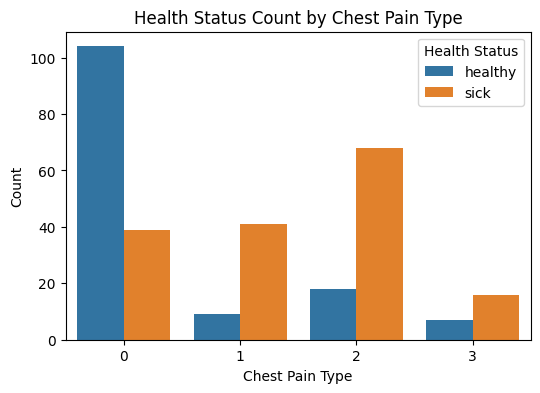

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(data=heart, x='chest_pain', hue='health_status')
plt.title('Health Status Count by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Health Status')
plt.show()

Observations:
- Chest Pain Type 0 is predominantly associated with "healthy" individuals
- The count of "sick" individuals being noticeably higher than "healthy" individuals for each of these chest pain types

4. Distribution of heart disease with thalach4. 

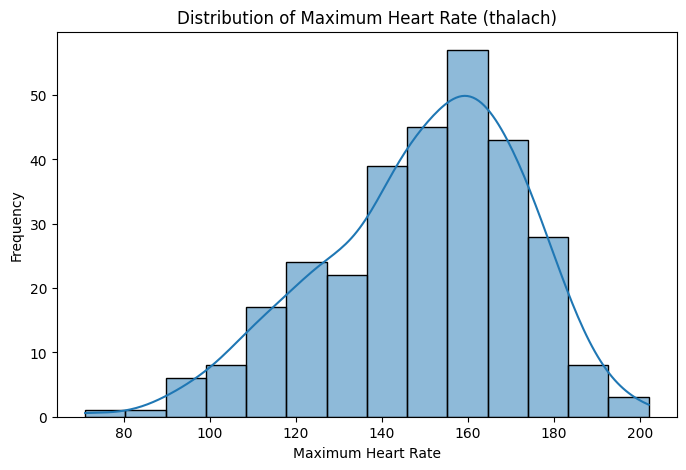

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(heart['thalach'], kde=True)
plt.title('Distribution of Maximum Heart Rate (thalach)')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

Observations:
- The most frequent maximum heart rate values fall within the range of approximately 150 to 170 beats per minute. 
- This indicates there are higher concentration of individuals with maximum heart rates.

5. Health Status Count by Number of Vessels

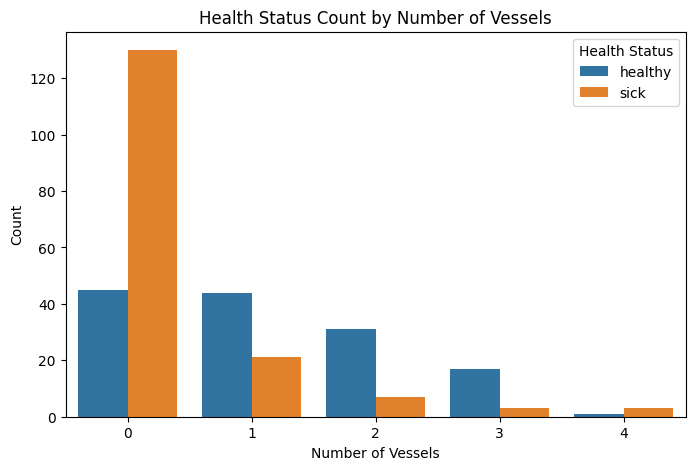

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(data=heart, x='vessels', hue='health_status')
plt.title('Health Status Count by Number of Vessels')
plt.xlabel('Number of Vessels')
plt.ylabel('Count')
plt.legend(title='Health Status')
plt.show()

Observations:

For vessel count 0, sick individuals are more prevalent, while for vessel counts 1 and above, healthy individuals are more common.

6. Average Cholesterol by Gender

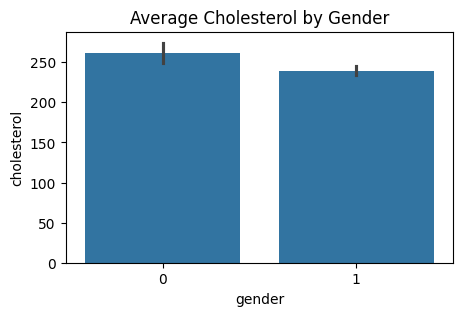

In [31]:
plt.figure(figsize=(5, 3))
sns.barplot(data=heart, x='gender', y='cholesterol')
plt.title("Average Cholesterol by Gender")
plt.show()

7. Count of Chest Pain Types

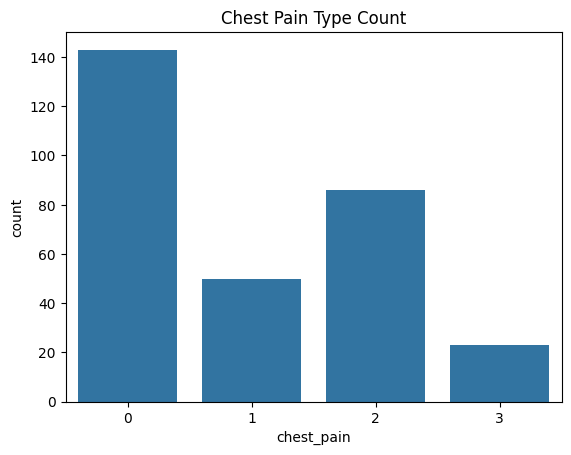

In [32]:
sns.countplot(data=heart, x='chest_pain')
plt.title("Chest Pain Type Count")
plt.show()

Observations:

females (gender 0) are predominantly sick, whereas males (gender 1) are mostly healthy.

8. Blood Pressure by Gender

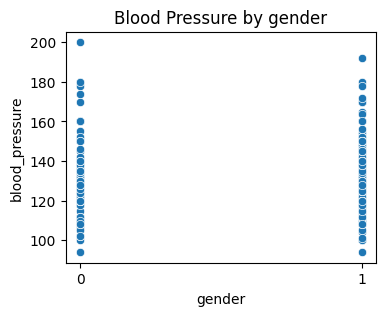

In [33]:
plt.figure(figsize=(4, 3))
sns.scatterplot(data=heart, x='gender', y='blood_pressure')
plt.title("Blood Pressure by gender")
plt.xticks([0, 1])
plt.show()

Observations:

Both males (1) and females (0) show a similar spread in blood pressure, indicating no major gender-based difference.

9. Age vs Cholesterol

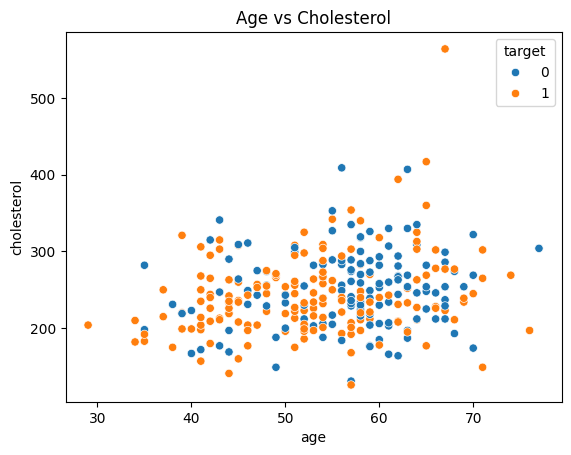

In [34]:
sns.scatterplot(data=heart, x='age', y='cholesterol', hue='target')
plt.title("Age vs Cholesterol")
plt.show()

Observations:

 Higher cholesterol levels are observed across various ages and cholesterol levels are observed above the age 35

10. Target Class Distribution

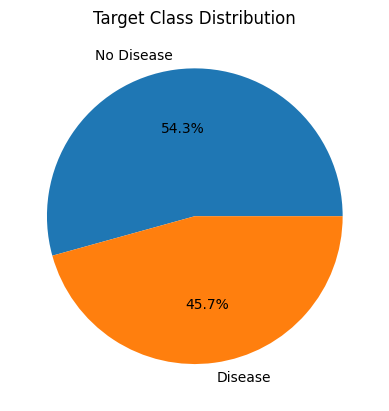

In [35]:
heart['target'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No Disease', 'Disease'])
plt.title("Target Class Distribution")
plt.ylabel("")
plt.show()

Observations:

Around 54% of the people doesn't contain any disease

11. Cholesterol Level Distribution Among Patients

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4012\3492323916.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=heart, x='cholesterol', shade=True)


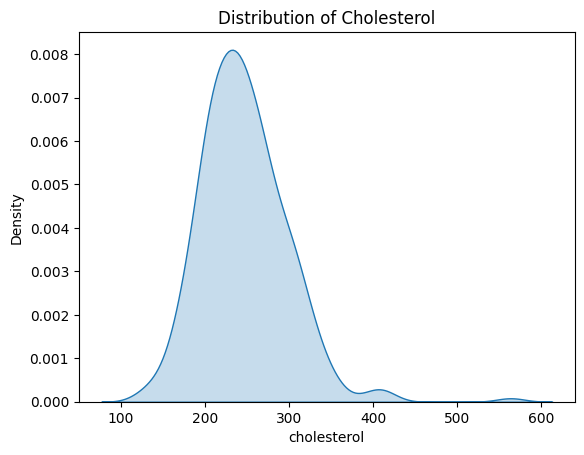

In [37]:
sns.kdeplot(data=heart, x='cholesterol', shade=True)
plt.title("Distribution of Cholesterol")
plt.show()

Observations:

Most people have cholesterol levels around 220, with fewer individuals having very high cholesterol.

12. Density Plot of Key Health Indicators

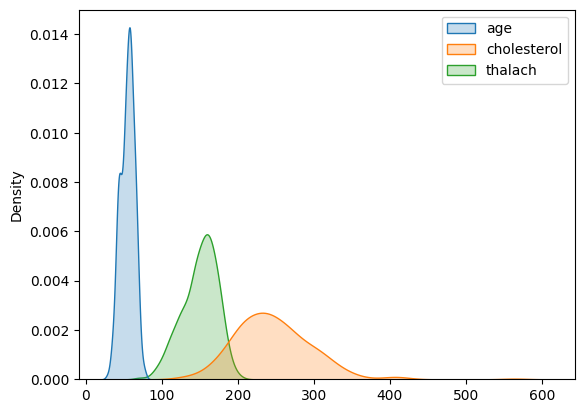

In [38]:
sns.kdeplot(data=heart[['age', 'cholesterol', 'thalach']], fill=True)
plt.show()

Observations:

Age, cholesterol, and maximum heart rate (thalach) show distinct distributions, with thalach and age centered at lower values compared to cholesterol.

# FINAL OBSERVAIONS

- The dataset gives a general picture of how various health factors relate to heart disease.
- People with no blocked vessels are more likely to be sick, while those with more vessels are often healthier.
- The number of healthy and sick individuals is fairly balanced, showing a mix in the population.
- Females appear to have more cases of heart disease compared to males.
- Males tend to be healthier overall in this dataset.
- Cholesterol levels seem to be slightly higher in females than in males.
- Blood pressure is spread across all individuals without big differences between males and females.
- Some types of chest pain are mostly seen in healthy people, while others are linked more with sickness.
- Most people have similar heart rate ranges, but a few have much higher or lower values.
- Overall, the dataset highlights clear patterns in how gender, chest pain, cholesterol, and other features relate to heart health.
